<a href="https://colab.research.google.com/github/pujitha-9/twitter_sentiment_anlysis/blob/main/tweets_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import pandas as pd

# Create one global analyzer object (reused later)
sid = SentimentIntensityAnalyzer()


In [3]:
def sentiment_scores(sentence, verbose=True):
    """Analyze one sentence and print sentiment details."""
    sentiment_dict = sid.polarity_scores(sentence)
    if verbose:
        print("\nTweet:", sentence)
        print(f"Overall sentiment dictionary is : {sentiment_dict}")
        print(f"sentence was rated as {sentiment_dict['neg']*100:.1f} % Negative")
        print(f"sentence was rated as {sentiment_dict['neu']*100:.1f} % Neutral")
        print(f"sentence was rated as {sentiment_dict['pos']*100:.1f} % Positive")
        print(f"Compound Score: {sentiment_dict['compound']:.4f}")

        if sentiment_dict['compound'] >= 0.05:
            print("Sentence Overall Rated As: Positive ✅")
        elif sentiment_dict['compound'] <= -0.05:
            print("Sentence Overall Rated As: Negative ❌")
        else:
            print("Sentence Overall Rated As: Neutral ⚪")
    return sentiment_dict


def plot_sentiment(sentiment_dict, title="Sentiment Distribution"):
    """Draw a bar chart of Positive/Neutral/Negative values."""
    labels = ['Positive', 'Neutral', 'Negative']
    values = [sentiment_dict['pos'], sentiment_dict['neu'], sentiment_dict['neg']]

    plt.bar(labels, values, color=['green', 'blue', 'red'])
    plt.title(title)
    plt.ylabel('Score (0–1)')
    plt.show()


def analyze_tweets_list(tweets, do_plot=False, save_csv_path=None):
    """Analyze a list of tweets and optionally save CSV."""
    rows = []
    for t in tweets:
        s = sid.polarity_scores(t)
        rows.append({
            'tweet': t,
            'neg': s['neg'],
            'neu': s['neu'],
            'pos': s['pos'],
            'compound': s['compound'],
            'label': 'positive' if s['compound']>=0.05 else ('negative' if s['compound']<=-0.05 else 'neutral')
        })
    df = pd.DataFrame(rows)

    if do_plot:
        avg = df[['pos','neu','neg']].mean().to_dict()
        plot_sentiment(avg, title="Average sentiment across tweets")

    if save_csv_path:
        df.to_csv(save_csv_path, index=False)
        print(f"Saved results to {save_csv_path}")

    return df


In [4]:
sentences = [
    "This session is going to be interesting.",
    "Study is going on as usual.",
    "I am very sad today.",
    "Success usually comes to those who are too busy to be looking for it."
]

for s in sentences:
    sentiment_scores(s)



Tweet: This session is going to be interesting.
Overall sentiment dictionary is : {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}
sentence was rated as 0.0 % Negative
sentence was rated as 69.0 % Neutral
sentence was rated as 31.0 % Positive
Compound Score: 0.4019
Sentence Overall Rated As: Positive ✅

Tweet: Study is going on as usual.
Overall sentiment dictionary is : {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as 0.0 % Negative
sentence was rated as 100.0 % Neutral
sentence was rated as 0.0 % Positive
Compound Score: 0.0000
Sentence Overall Rated As: Neutral ⚪

Tweet: I am very sad today.
Overall sentiment dictionary is : {'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'compound': -0.5256}
sentence was rated as 45.9 % Negative
sentence was rated as 54.1 % Neutral
sentence was rated as 0.0 % Positive
Compound Score: -0.5256
Sentence Overall Rated As: Negative ❌

Tweet: Success usually comes to those who are too busy to be looking for it.
Overall sent

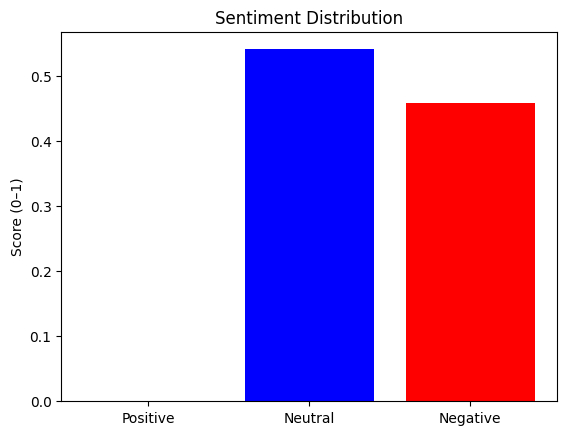

In [5]:
# Visualize one example
result = sentiment_scores("I am very sad today.", verbose=False)
plot_sentiment(result)


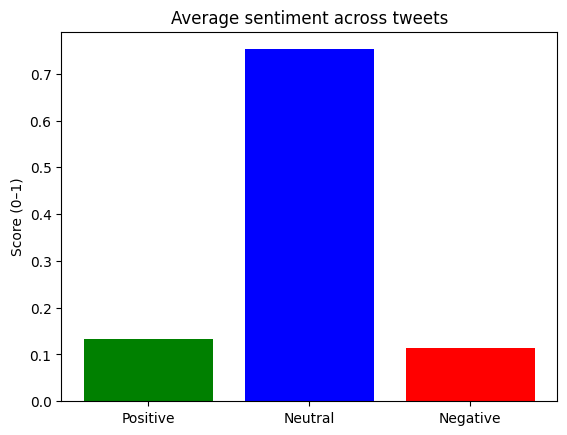

Saved results to twitter_sentiments.csv


,tweet,neg,neu,pos,compound,label
0,This session is going to be interesting.,0.000,0.690,0.310,0.4019,positive
1,Study is going on as usual.,0.000,1.000,0.000,0.0000,neutral
2,I am very sad today.,0.459,0.541,0.000,-0.5256,negative
3,Success usually comes to those who are too bus...,0.000,0.778,0.222,0.5719,positive


In [6]:
df = analyze_tweets_list(sentences, do_plot=True, save_csv_path="twitter_sentiments.csv")
df.head()


Enter text (e.g. a tweet or any sentence): I love learning new things!

Tweet: I love learning new things!
Overall sentiment dictionary is : {'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'compound': 0.6696}
sentence was rated as 0.0 % Negative
sentence was rated as 47.1 % Neutral
sentence was rated as 52.9 % Positive
Compound Score: 0.6696
Sentence Overall Rated As: Positive ✅


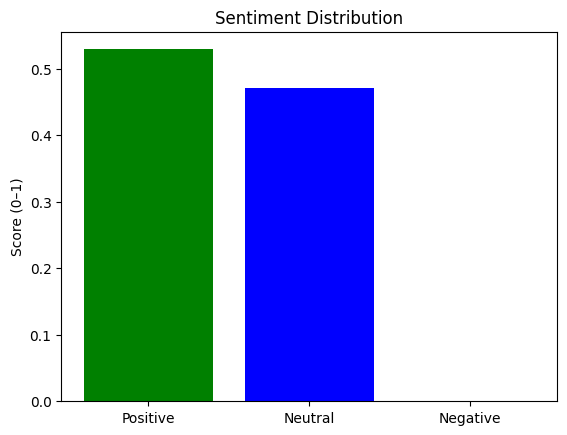

In [9]:
# 🔹 Interactive input for user text
text = input("Enter text (e.g. a tweet or any sentence): ")

# 🔹 Analyze and display sentiment
sentiment = sentiment_scores(text)

# 🔹 Optional: visualize with bar chart
plot_sentiment(sentiment)
